Data Loading and Cleaning

In [4]:
import pandas as pd

# Load the datasets
retail_sales = pd.read_csv('retail_sales_dataset.csv')
menu = pd.read_csv('menu.csv')

# Fill missing values and handle data types
retail_sales.fillna({'Customer ID': 'Unknown', 'Gender': 'Unknown'}, inplace=True)
menu.fillna(0, inplace=True)

# Convert 'Date' to datetime format
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])

# Remove duplicates
retail_sales.drop_duplicates(inplace=True)
menu.drop_duplicates(inplace=True)


Descriptive Statistics

In [5]:
# Retail Sales Descriptive Statistics
retail_sales_stats = retail_sales.describe(include='all')

# Menu Descriptive Statistics
menu_stats = menu.describe(include='all')

# Print summary statistics
print("Retail Sales Statistics:\n", retail_sales_stats)
print("Menu Statistics:\n", menu_stats)


Retail Sales Statistics:
         Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN     CUST001  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity 

Time Series Analysis (Retail Sales)

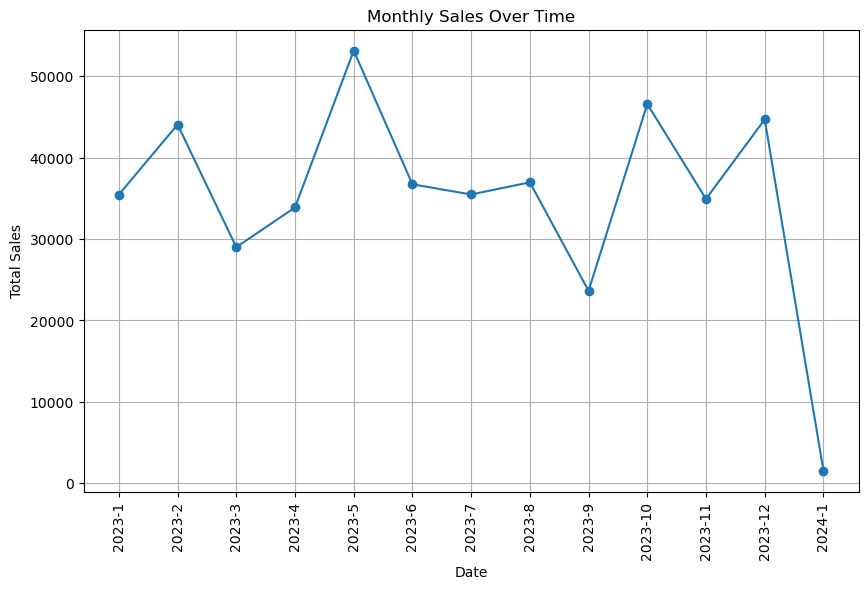

In [6]:
import matplotlib.pyplot as plt

# Extracting necessary time components
retail_sales['Year'] = retail_sales['Date'].dt.year
retail_sales['Month'] = retail_sales['Date'].dt.month
retail_sales['Day'] = retail_sales['Date'].dt.day

# Group by year and month
monthly_sales = retail_sales.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Customer and Product Analysis (Retail Sales)

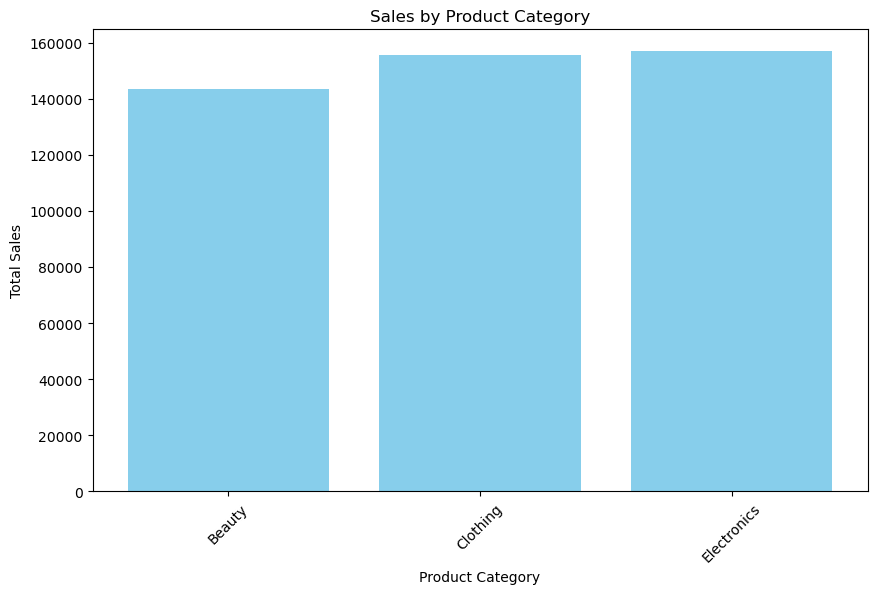

In [9]:
# Customer Demographics
customer_demo = retail_sales.groupby('Customer ID')[['Gender', 'Age']].first().reset_index()

# Product Category Analysis
product_sales = retail_sales.groupby('Product Category')[['Quantity', 'Total Amount']].sum().reset_index()

# Plotting Product Category Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(product_sales['Product Category'], product_sales['Total Amount'], color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Nutritional Analysis (Menu Data)

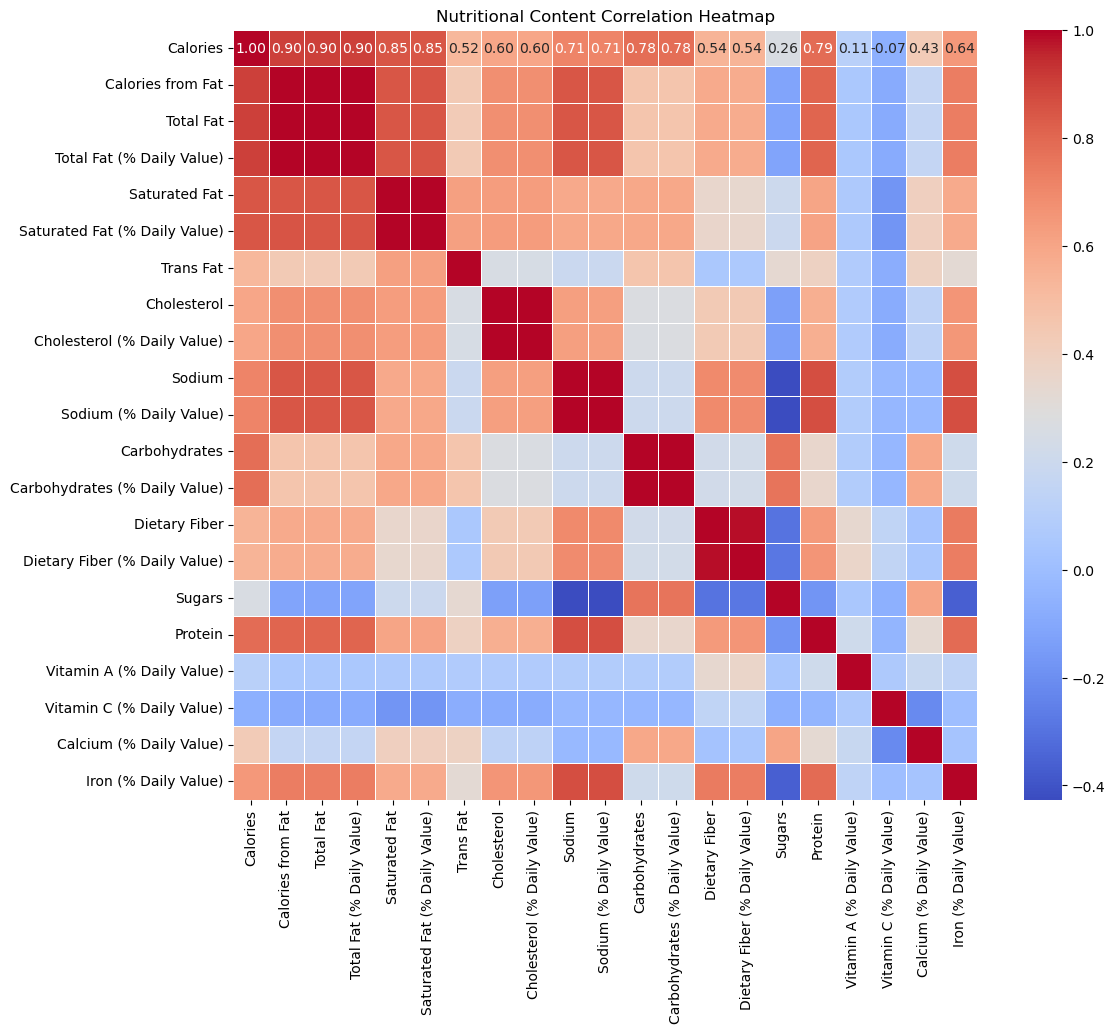

In [8]:
# Correlation Analysis
# Selecting only the numeric columns for correlation calculation
numeric_columns = menu.select_dtypes(include=['float64', 'int64']).columns
menu_corr = menu[numeric_columns].corr()

# Plotting Heatmap for Nutritional Content Correlation
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(menu_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Nutritional Content Correlation Heatmap')
plt.show()


Visualization

C:\Users\Akash\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


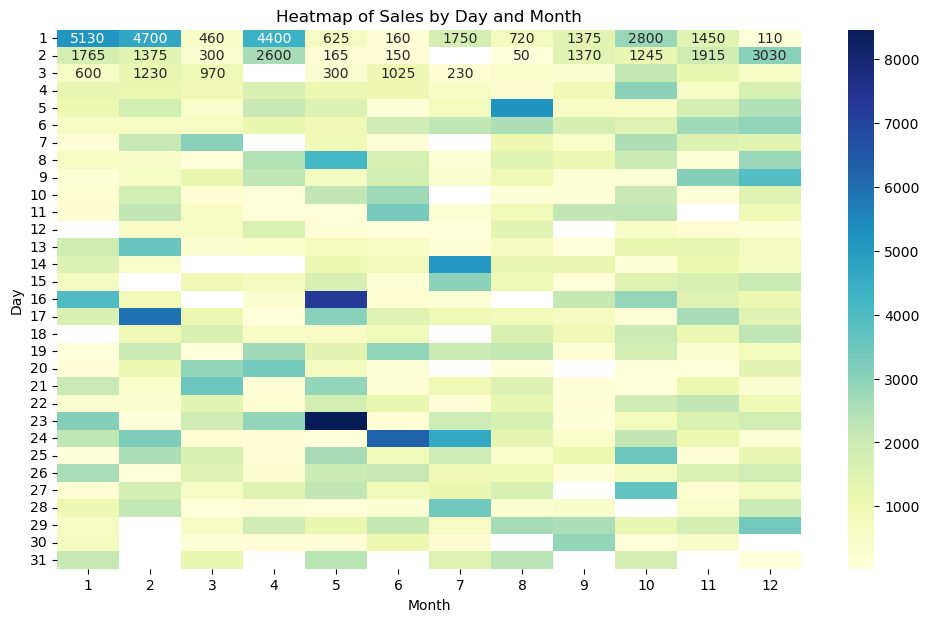

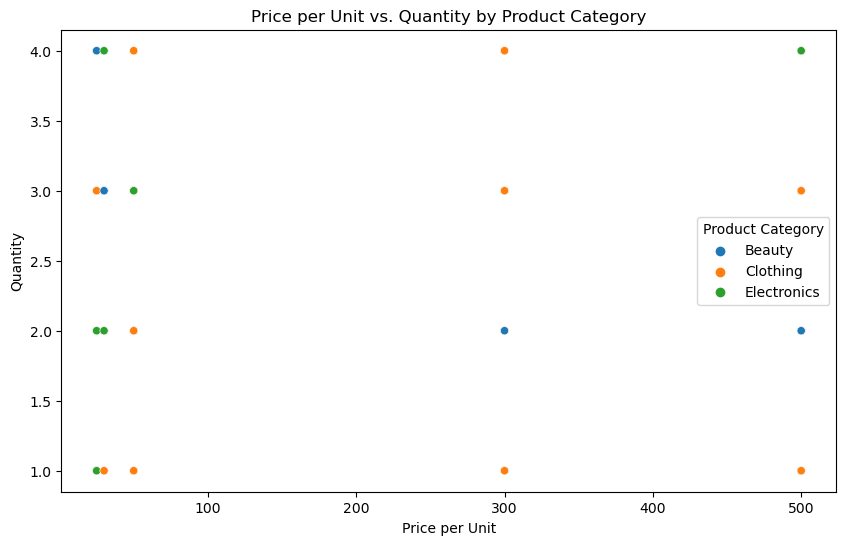

In [6]:
# Heatmap of retail sales by day and month
sales_heatmap = retail_sales.pivot_table(index='Day', columns='Month', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(12, 7))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Sales by Day and Month')
plt.show()

# Scatter plot for price vs. quantity (retail sales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity', hue='Product Category', data=retail_sales)
plt.title('Price per Unit vs. Quantity by Product Category')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')
plt.show()
